In [120]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

base = pd.read_csv('../data/DATAthon 팀 프로젝트/Base.csv')
base_copy = base.copy()

var1 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant I.csv')
var1_copy = var1.copy()

var2 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant II.csv')
var2_copy = var2.copy()

var3 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant III.csv')
var3_copy = var3.copy()

var4 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant IV.csv')
var4_copy = var4.copy()

var5 = pd.read_csv('../data/DATAthon 팀 프로젝트/Variant V.csv')
var5_copy = var5.copy()

In [121]:
def EDA_dataset(df):
    drop_col = ['payment_type', 'employment_status', 'prev_address_months_count', 'intended_balcon_amount', 'housing_status', 'days_since_request']
    df.drop(columns = drop_col, inplace = True)

    df = df[df['current_address_months_count'] >= 0]

    df['bank_months_count'].replace({-1: 0}, inplace = True)

    df = df[df['session_length_in_minutes'] >= 0]

    df['proposed_credit_limit'] = df['proposed_credit_limit'].astype(int)


    return df


In [122]:
base_df_copy = EDA_dataset(base_copy)
var1_copy = EDA_dataset(var1_copy)
var2_copy = EDA_dataset(var2_copy)
var3_copy = EDA_dataset(var3_copy)
var4_copy = EDA_dataset(var4_copy)
var5_copy = EDA_dataset(var5_copy)

In [123]:
base_copy

fraud_bool  income  name_email_similarity  \
0                0     0.3               0.986506   
1                0     0.8               0.617426   
2                0     0.8               0.996707   
3                0     0.6               0.475100   
4                0     0.9               0.842307   
...            ...     ...                    ...   
999995           0     0.8               0.124690   
999996           0     0.9               0.824544   
999997           0     0.8               0.140891   
999998           0     0.9               0.002480   
999999           0     0.6               0.993391   

        current_address_months_count  customer_age  zip_count_4w  \
0                                 25            40          1059   
1                                 89            20          1658   
2                                 14            40          1095   
3                                 14            30          3483   
4                                 29            40          2339   
...                              ...           ...           ...   
999995                           143            30           530   
999996                           193            30           408   
999997                           202            10           749   
999998                             3            30           707   
999999                           174            30           655   

         velocity_6h  velocity_24h  velocity_4w  bank_branch_count_8w  ...  \
0       13096.035018   7850.955007  6742.080561                     5  ...   
1        9223.283431   5745.251481  5941.664859                     3  ...   
2        4471.472149   5471.988958  5992.555113                    15  ...   
3       14431.993621   6755.344479  5970.336831                    11  ...   
4        7601.511579   5124.046930  5940.734212                     1  ...   
...              ...           ...          ...                   ...  ...   
999995   6732.602414   3010.048099  3095.754245                    42  ...   
999996   1574.293294   2716.495767  4286.089050                     0  ...   
999997   1258.864938   3601.322892  3103.891664                     2  ...   
999998   7048.137128   6521.395012  3068.265084                     7  ...   
999999   3737.076479   3135.788094  3051.003293                    14  ...   

        has_other_cards  proposed_credit_limit  foreign_request    source  \
0                     0                 1500.0                0  INTERNET   
1                     0                 1500.0                0  INTERNET   
2                     0                  200.0                0  INTERNET   
3                     0                  200.0                0  INTERNET   
4                     0                  200.0                0  INTERNET   
...                 ...                    ...              ...       ...   
999995                0                 1500.0                0  INTERNET   
999996                1                 1000.0                0  INTERNET   
999997                0                  200.0                0  INTERNET   
999998                0                  200.0                0  INTERNET   
999999                1                  200.0                0  INTERNET   

        session_length_in_minutes  device_os  keep_alive_session  \
0                       16.224843      linux                   1   
1                        3.363854      other                   1   
2                       22.730559    windows                   0   
3                       15.215816      linux                   1   
4                        3.743048      other                   0   
...                           ...        ...                 ...   
999995                  16.967770      other                   0   
999996                   1.504109  macintosh                   0   
999997                  16.068595      other                   0   
999998      

In [124]:
def one_hot(df):
    object_cols = ['source', 'device_os']
    df = pd.get_dummies(df, columns=object_cols, drop_first=True, dtype=int)

    return df


In [125]:
base_copy = one_hot(base_copy)
var1_copy = one_hot(var1_copy)  
var2_copy = one_hot(var2_copy)
var3_copy = one_hot(var3_copy)
var4_copy = one_hot(var4_copy)
var5_copy = one_hot(var5_copy)

In [126]:
from sklearn.model_selection import train_test_split
def split_data(df):
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 0), 'group'] = 0
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 1), 'group'] = 1
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 0), 'group'] = 2
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 1), 'group'] = 3
    df['group'] = df['group'].astype(int)

    X = df.drop(columns=['group'])
    y = df['group']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    return X_train, X_test, y_train, y_test




In [127]:
base_sam, X_test, y_train, y_test = split_data(base_copy)
var1_sam, X_test, y_train, y_test = split_data(var1_copy)
var2_sam, X_test, y_train, y_test = split_data(var2_copy)
var3_sam, X_test, y_train, y_test = split_data(var3_copy)
var4_sam, X_test, y_train, y_test = split_data(var4_copy)
var5_sam, X_test, y_train, y_test = split_data(var5_copy)

In [128]:
base_df_copy['device_fraud_count'].sum()

0

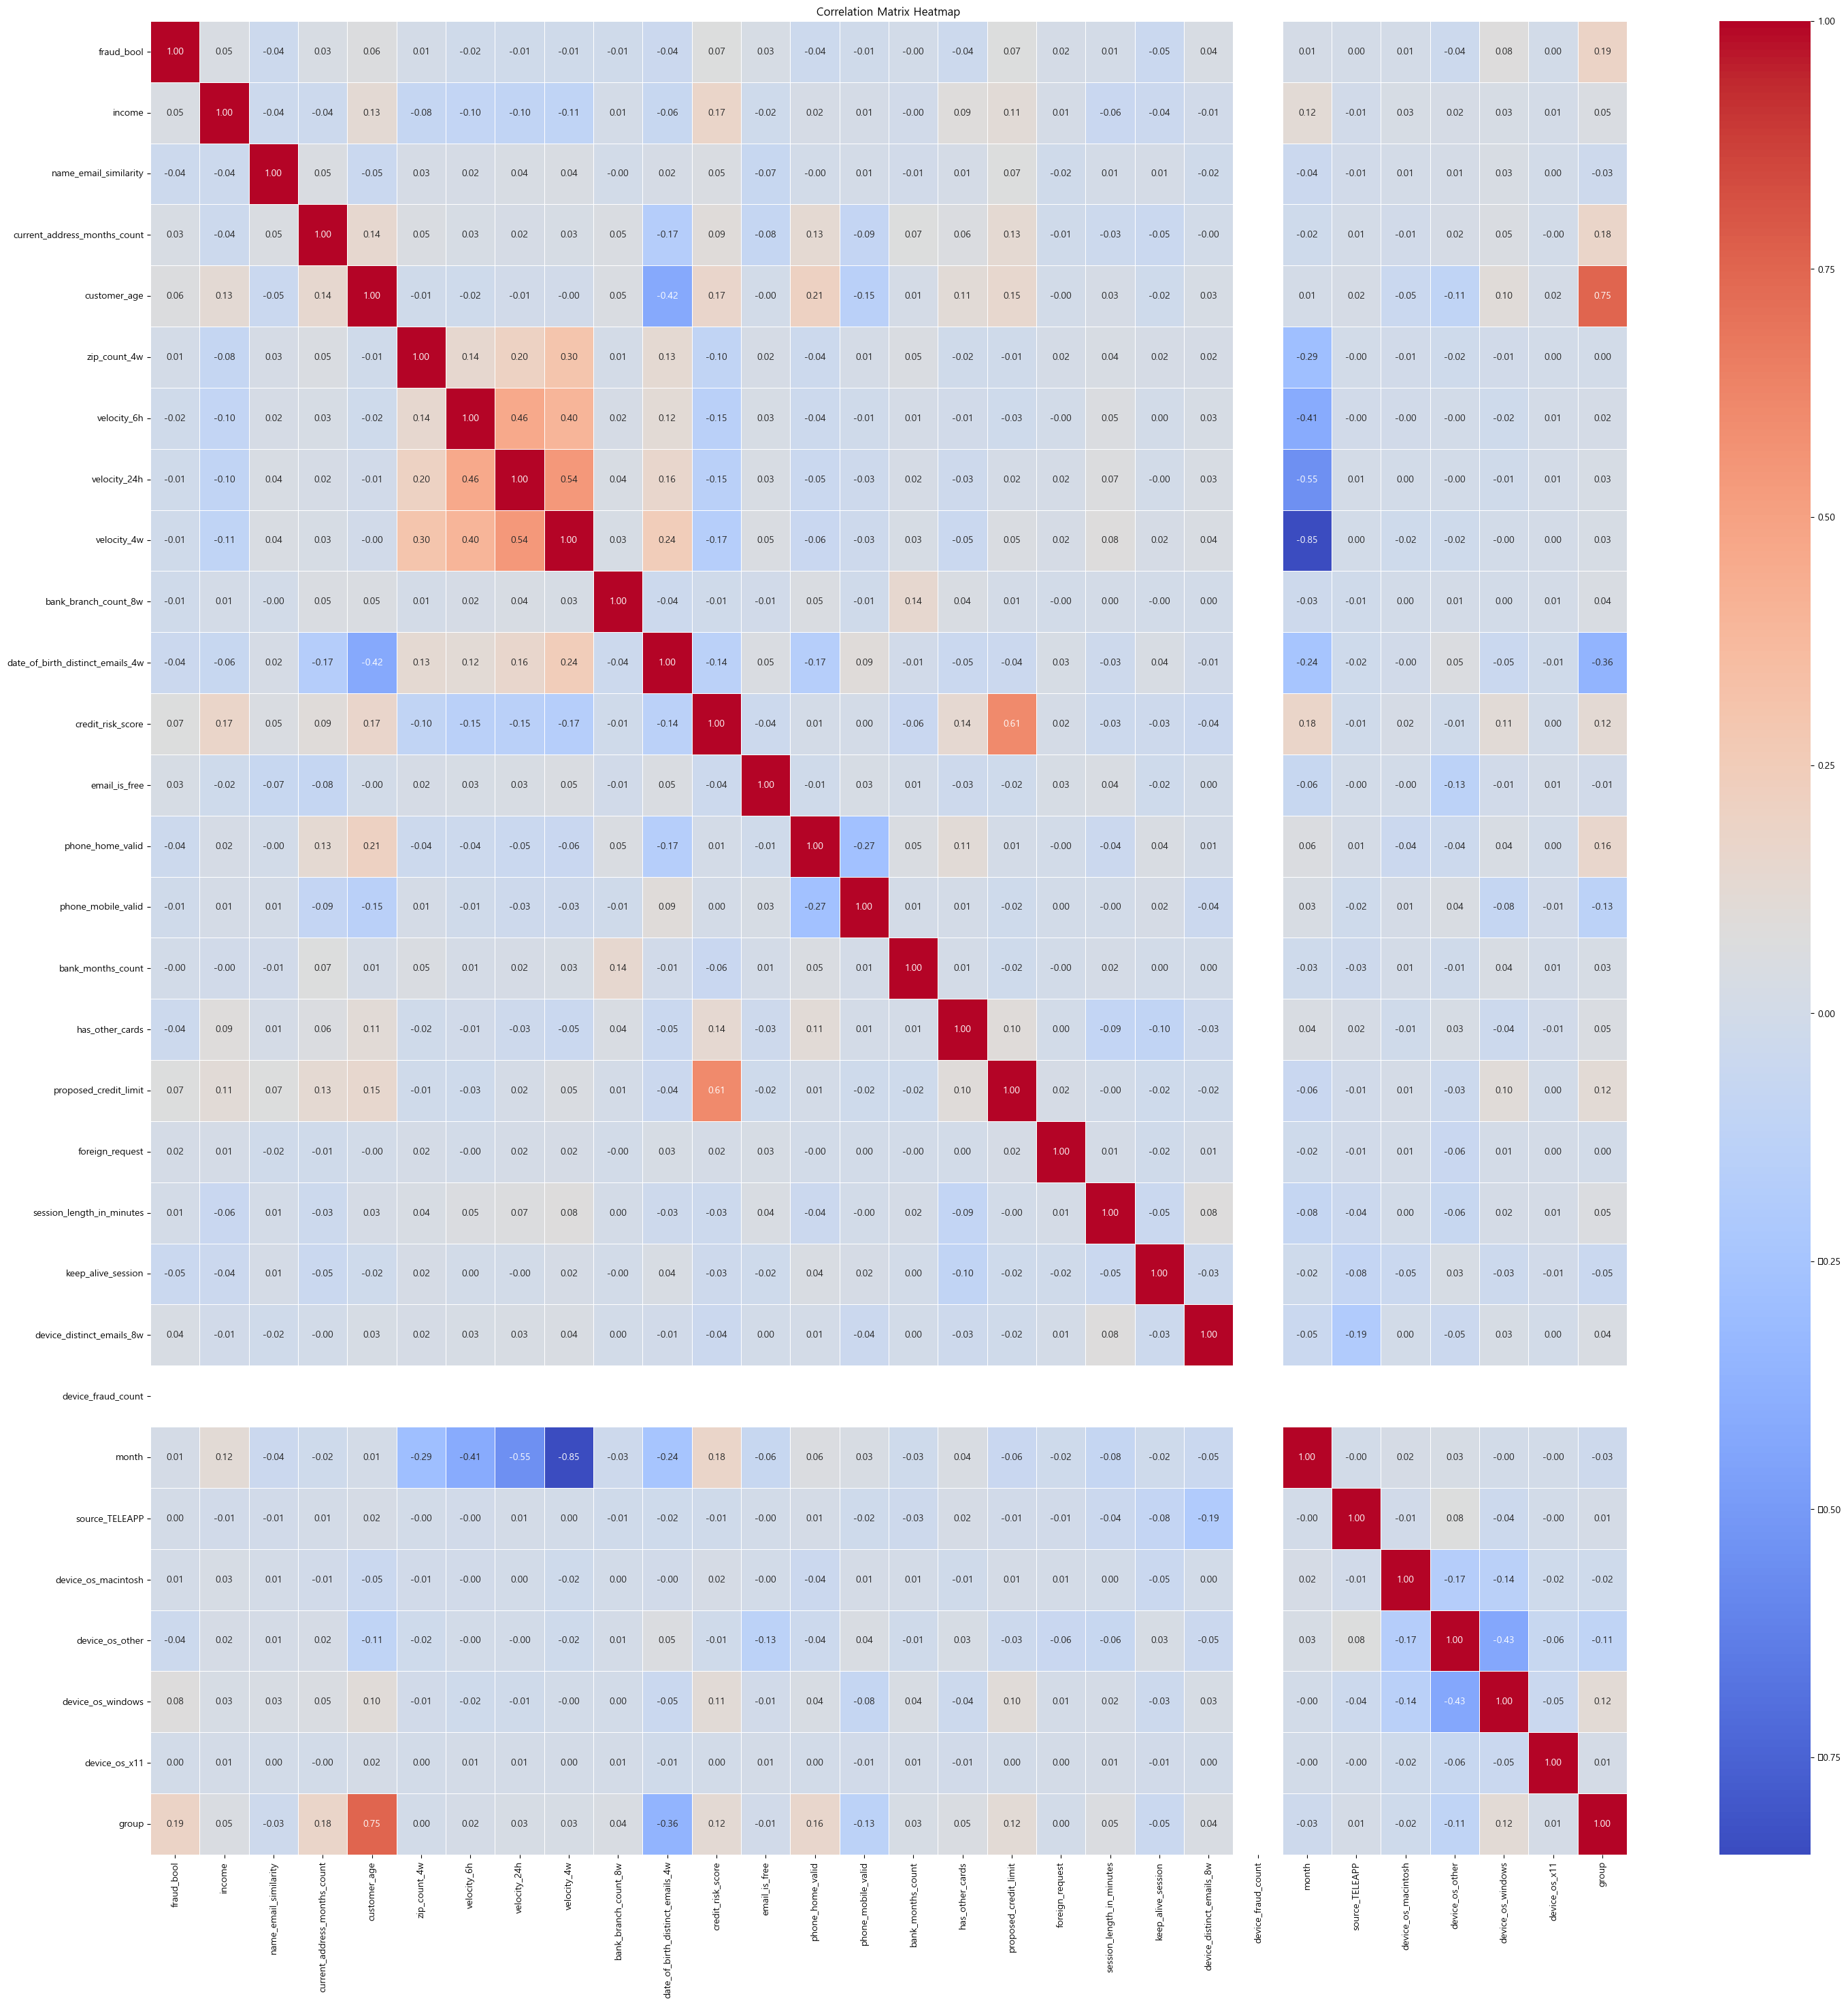

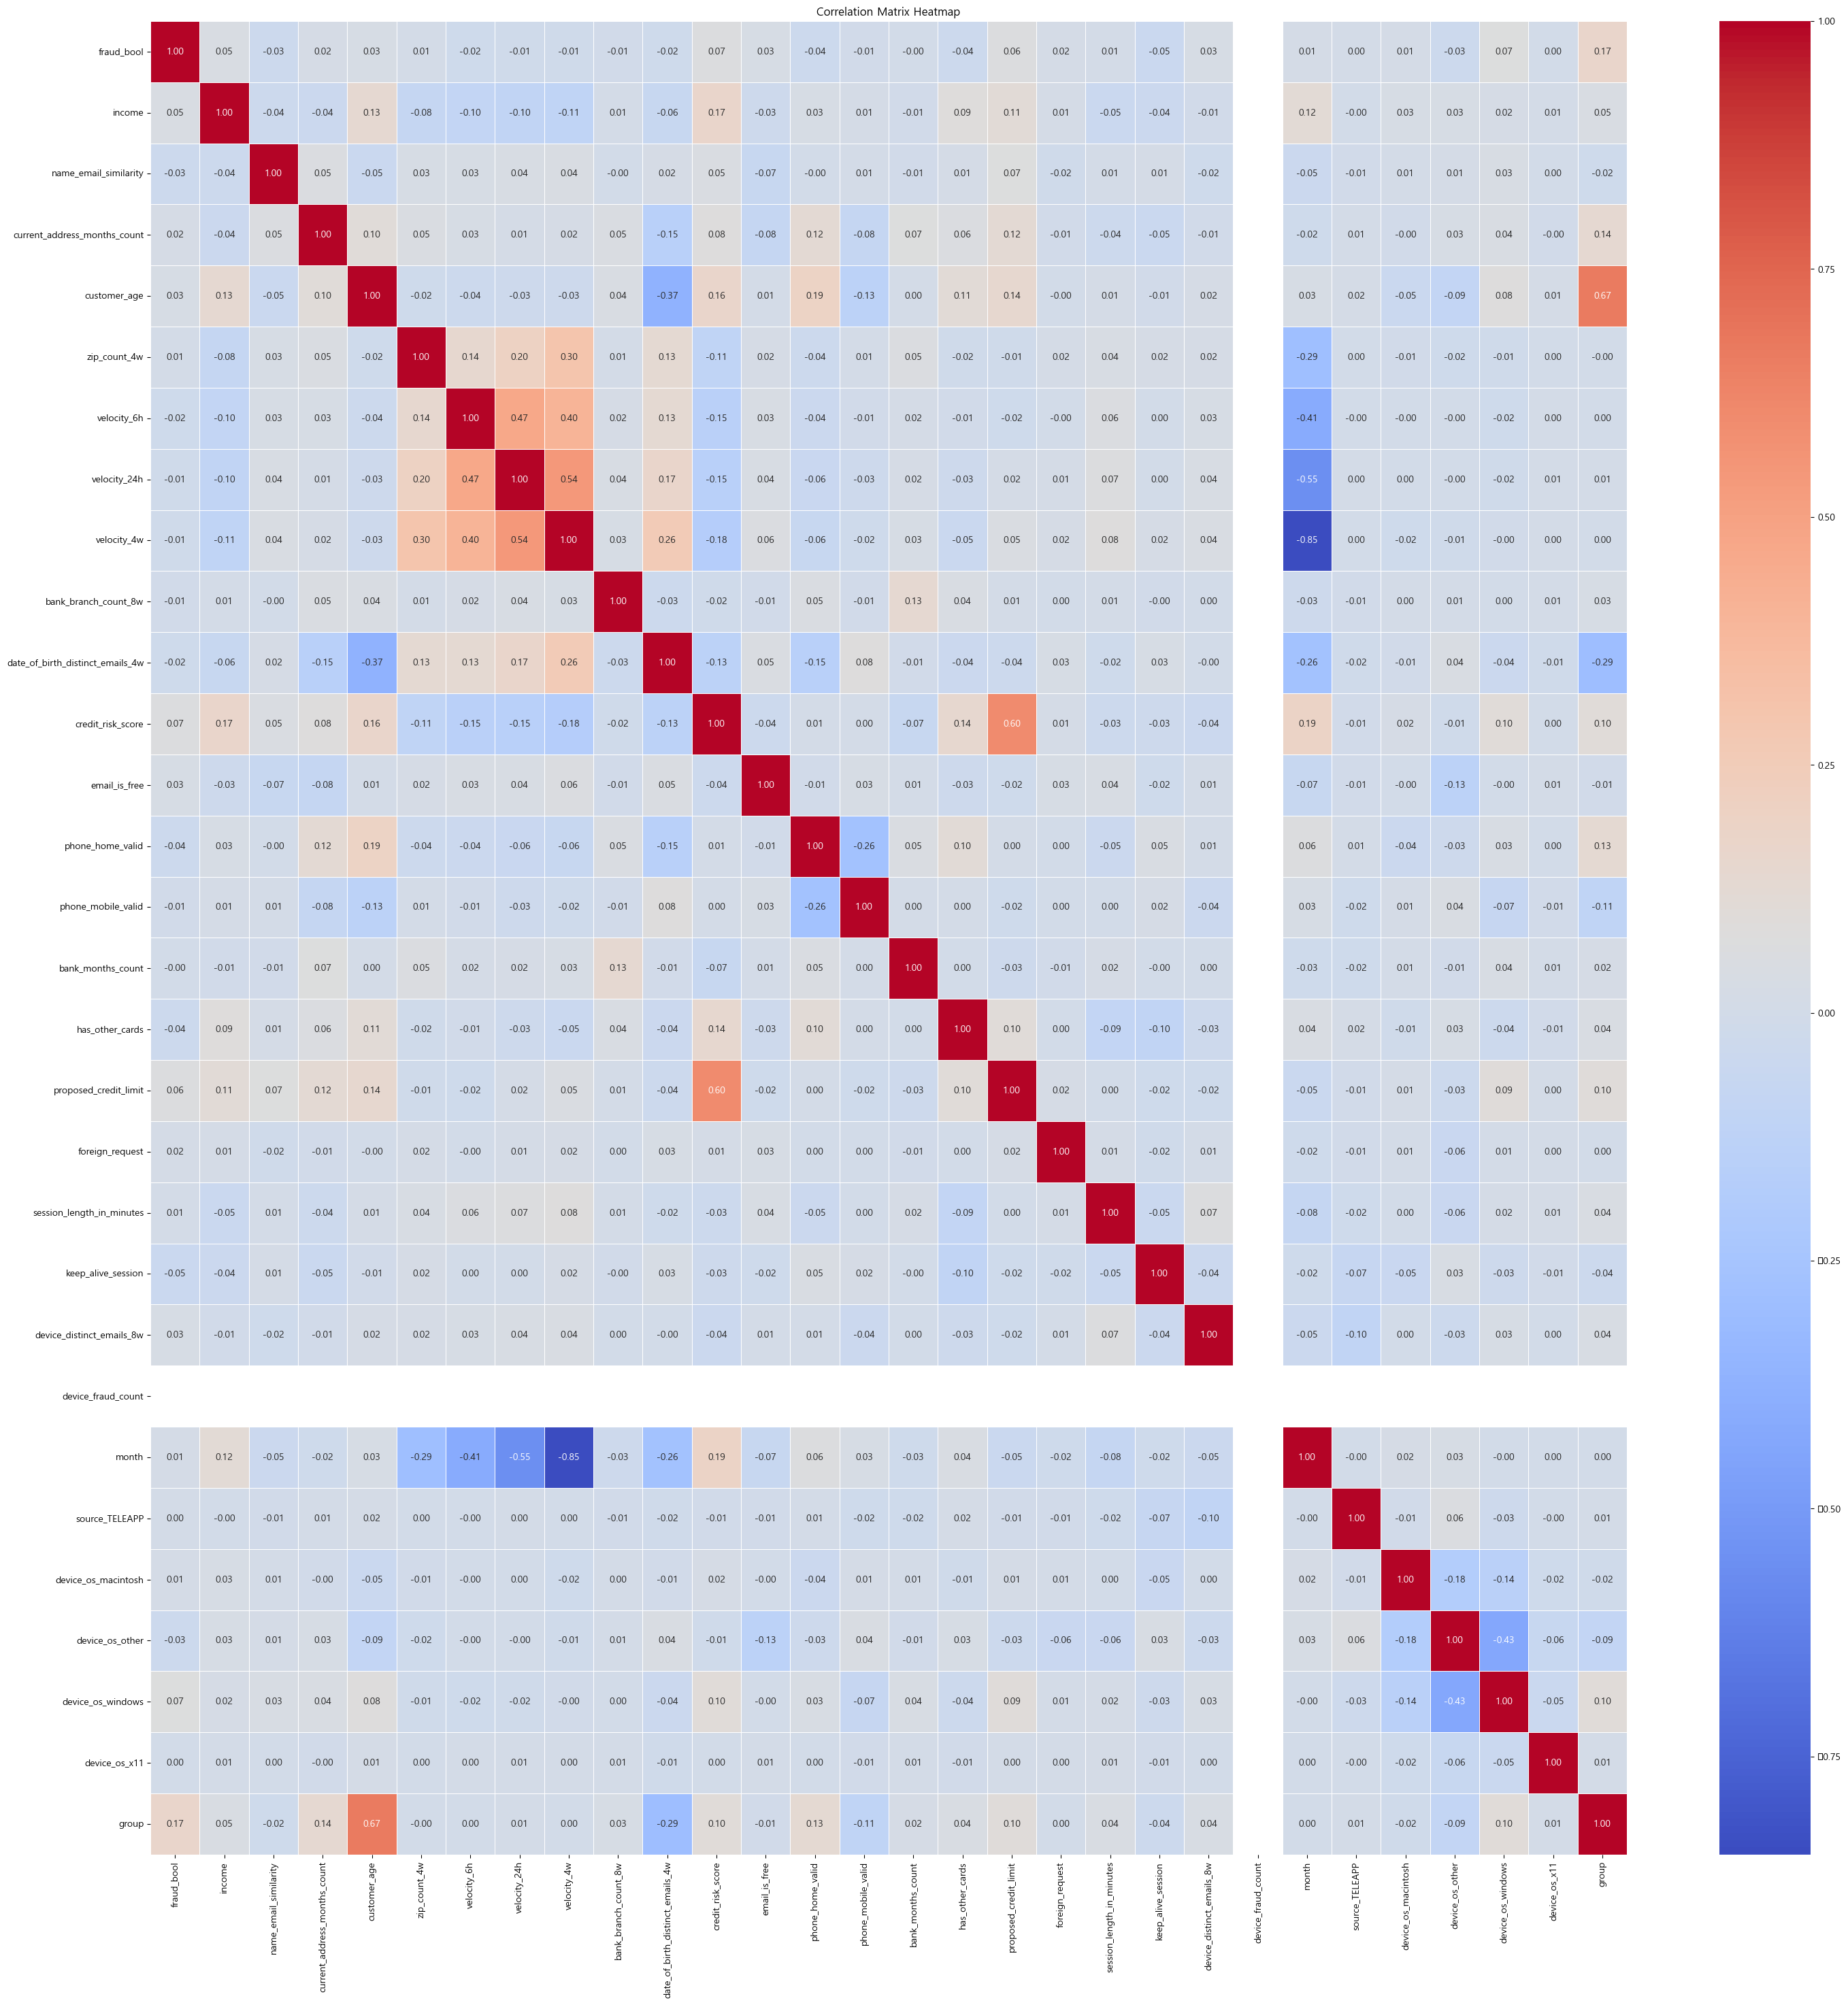

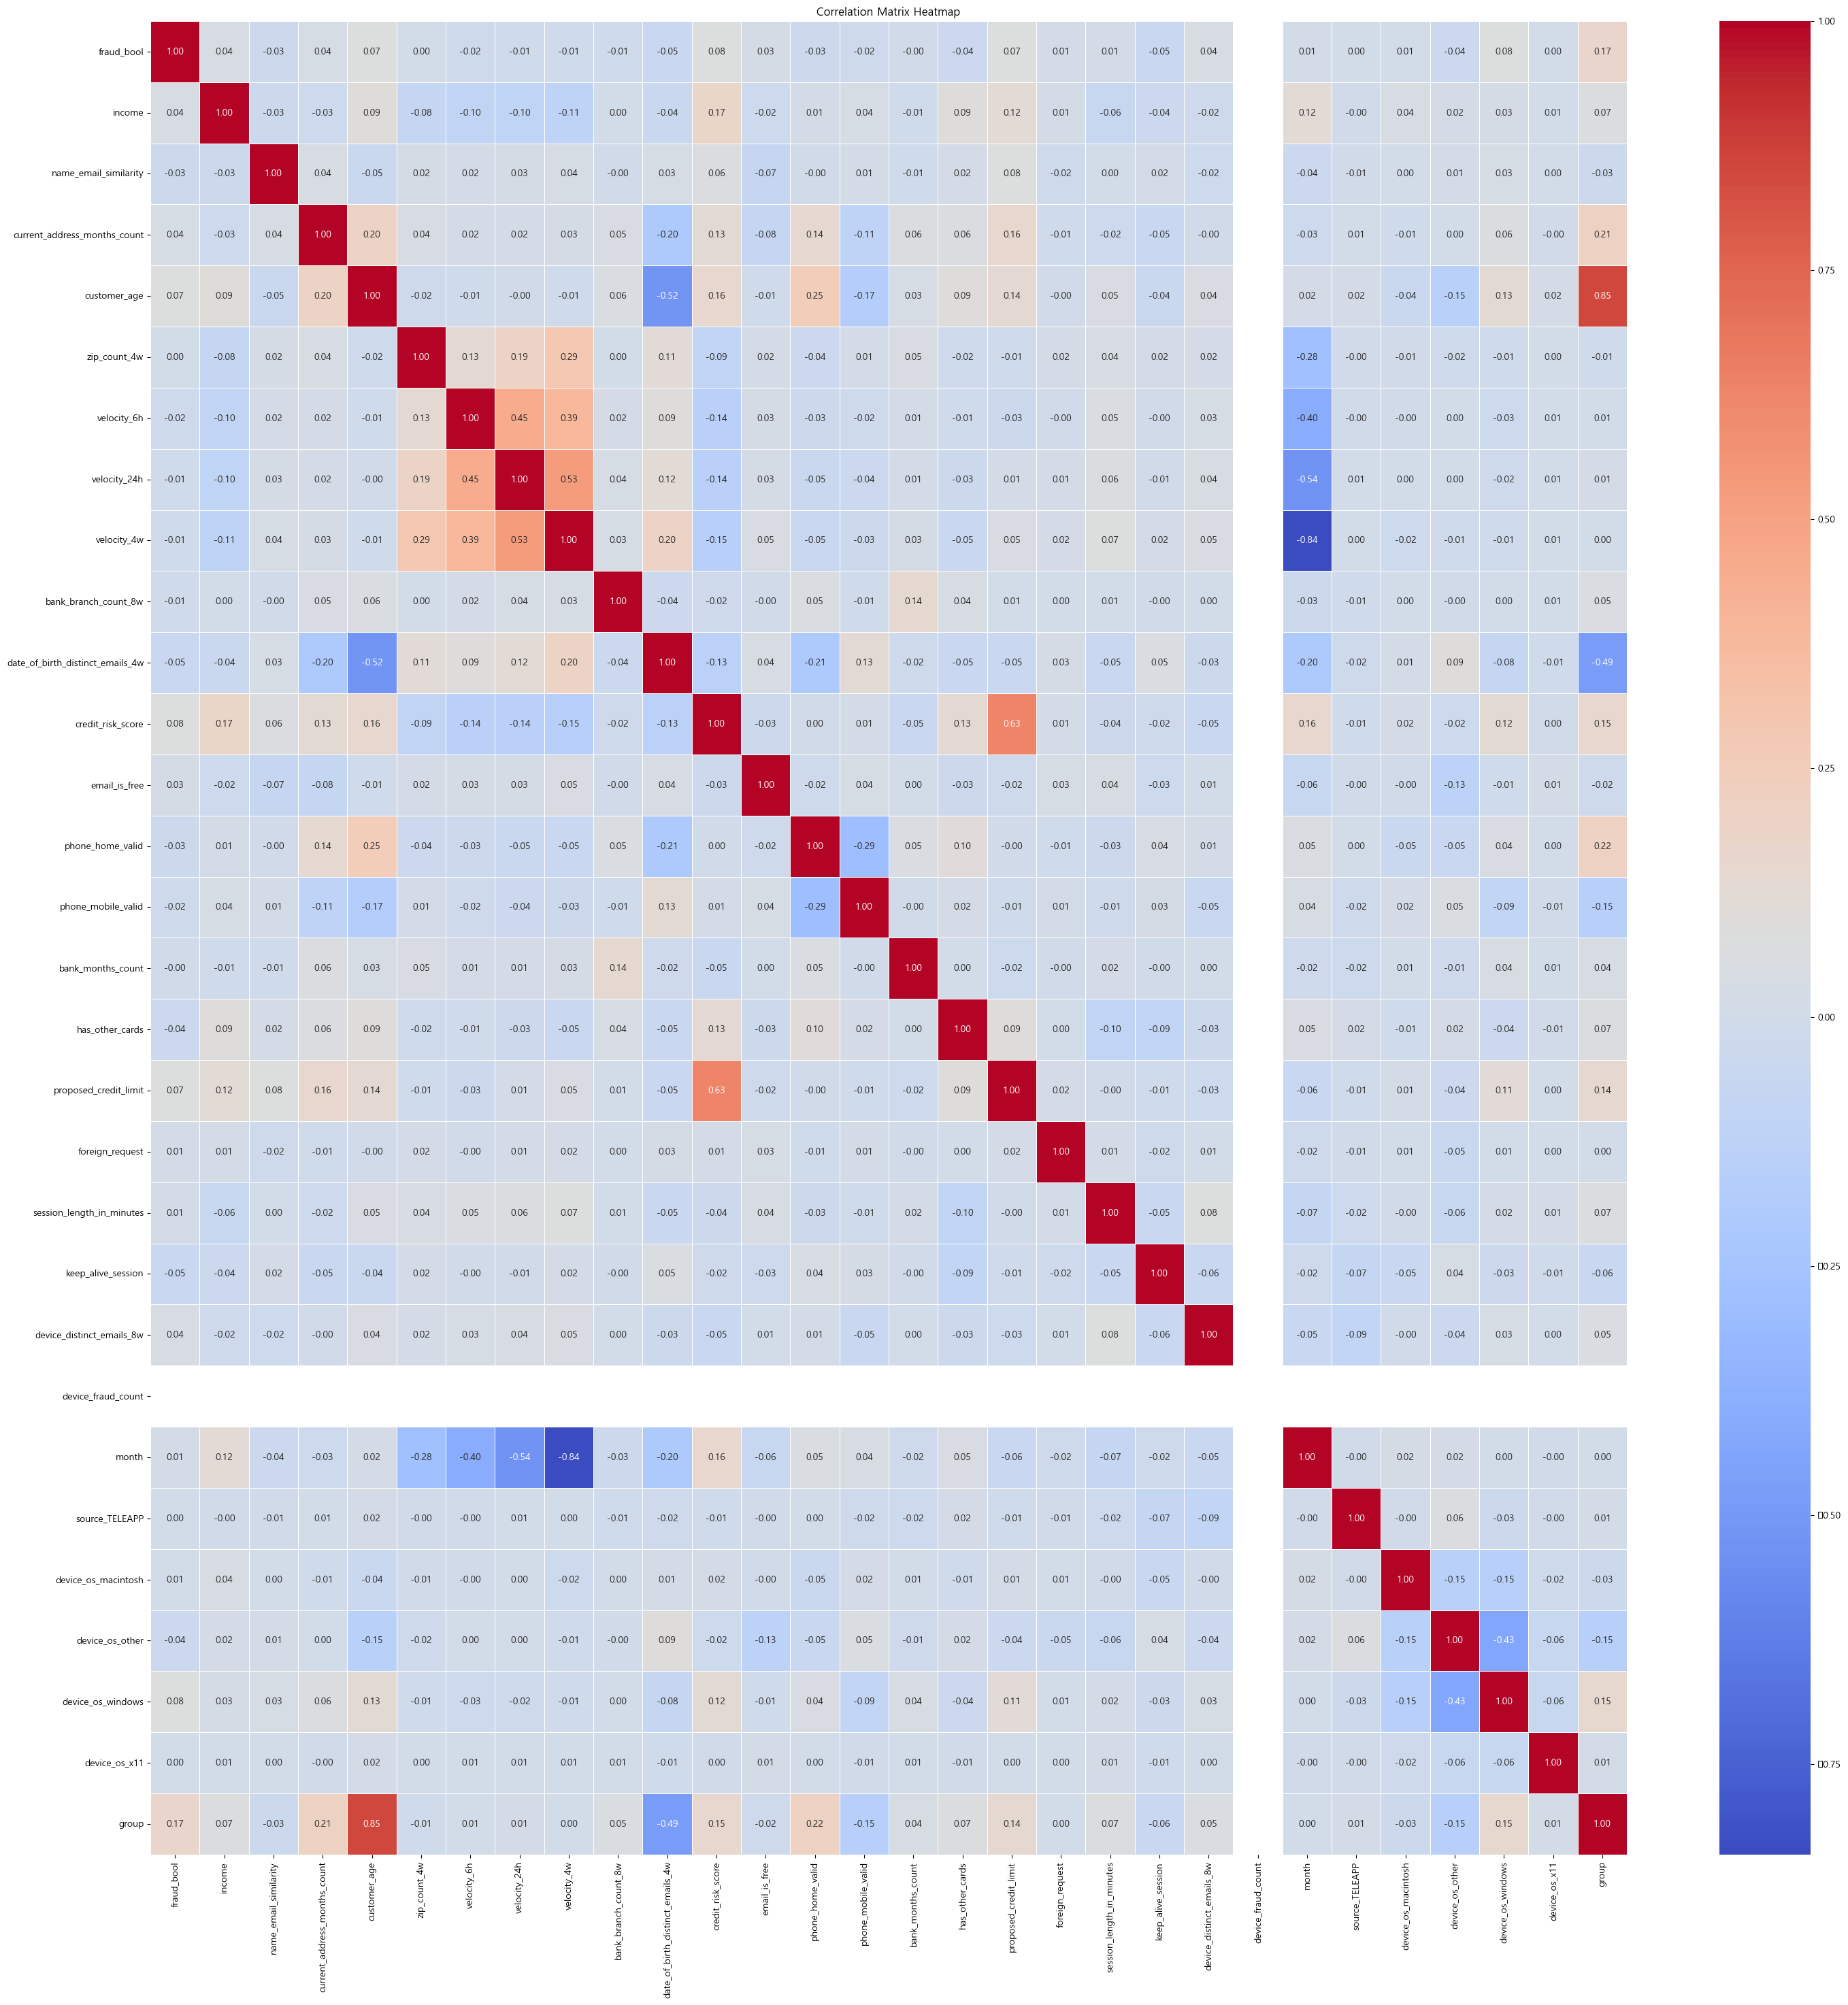

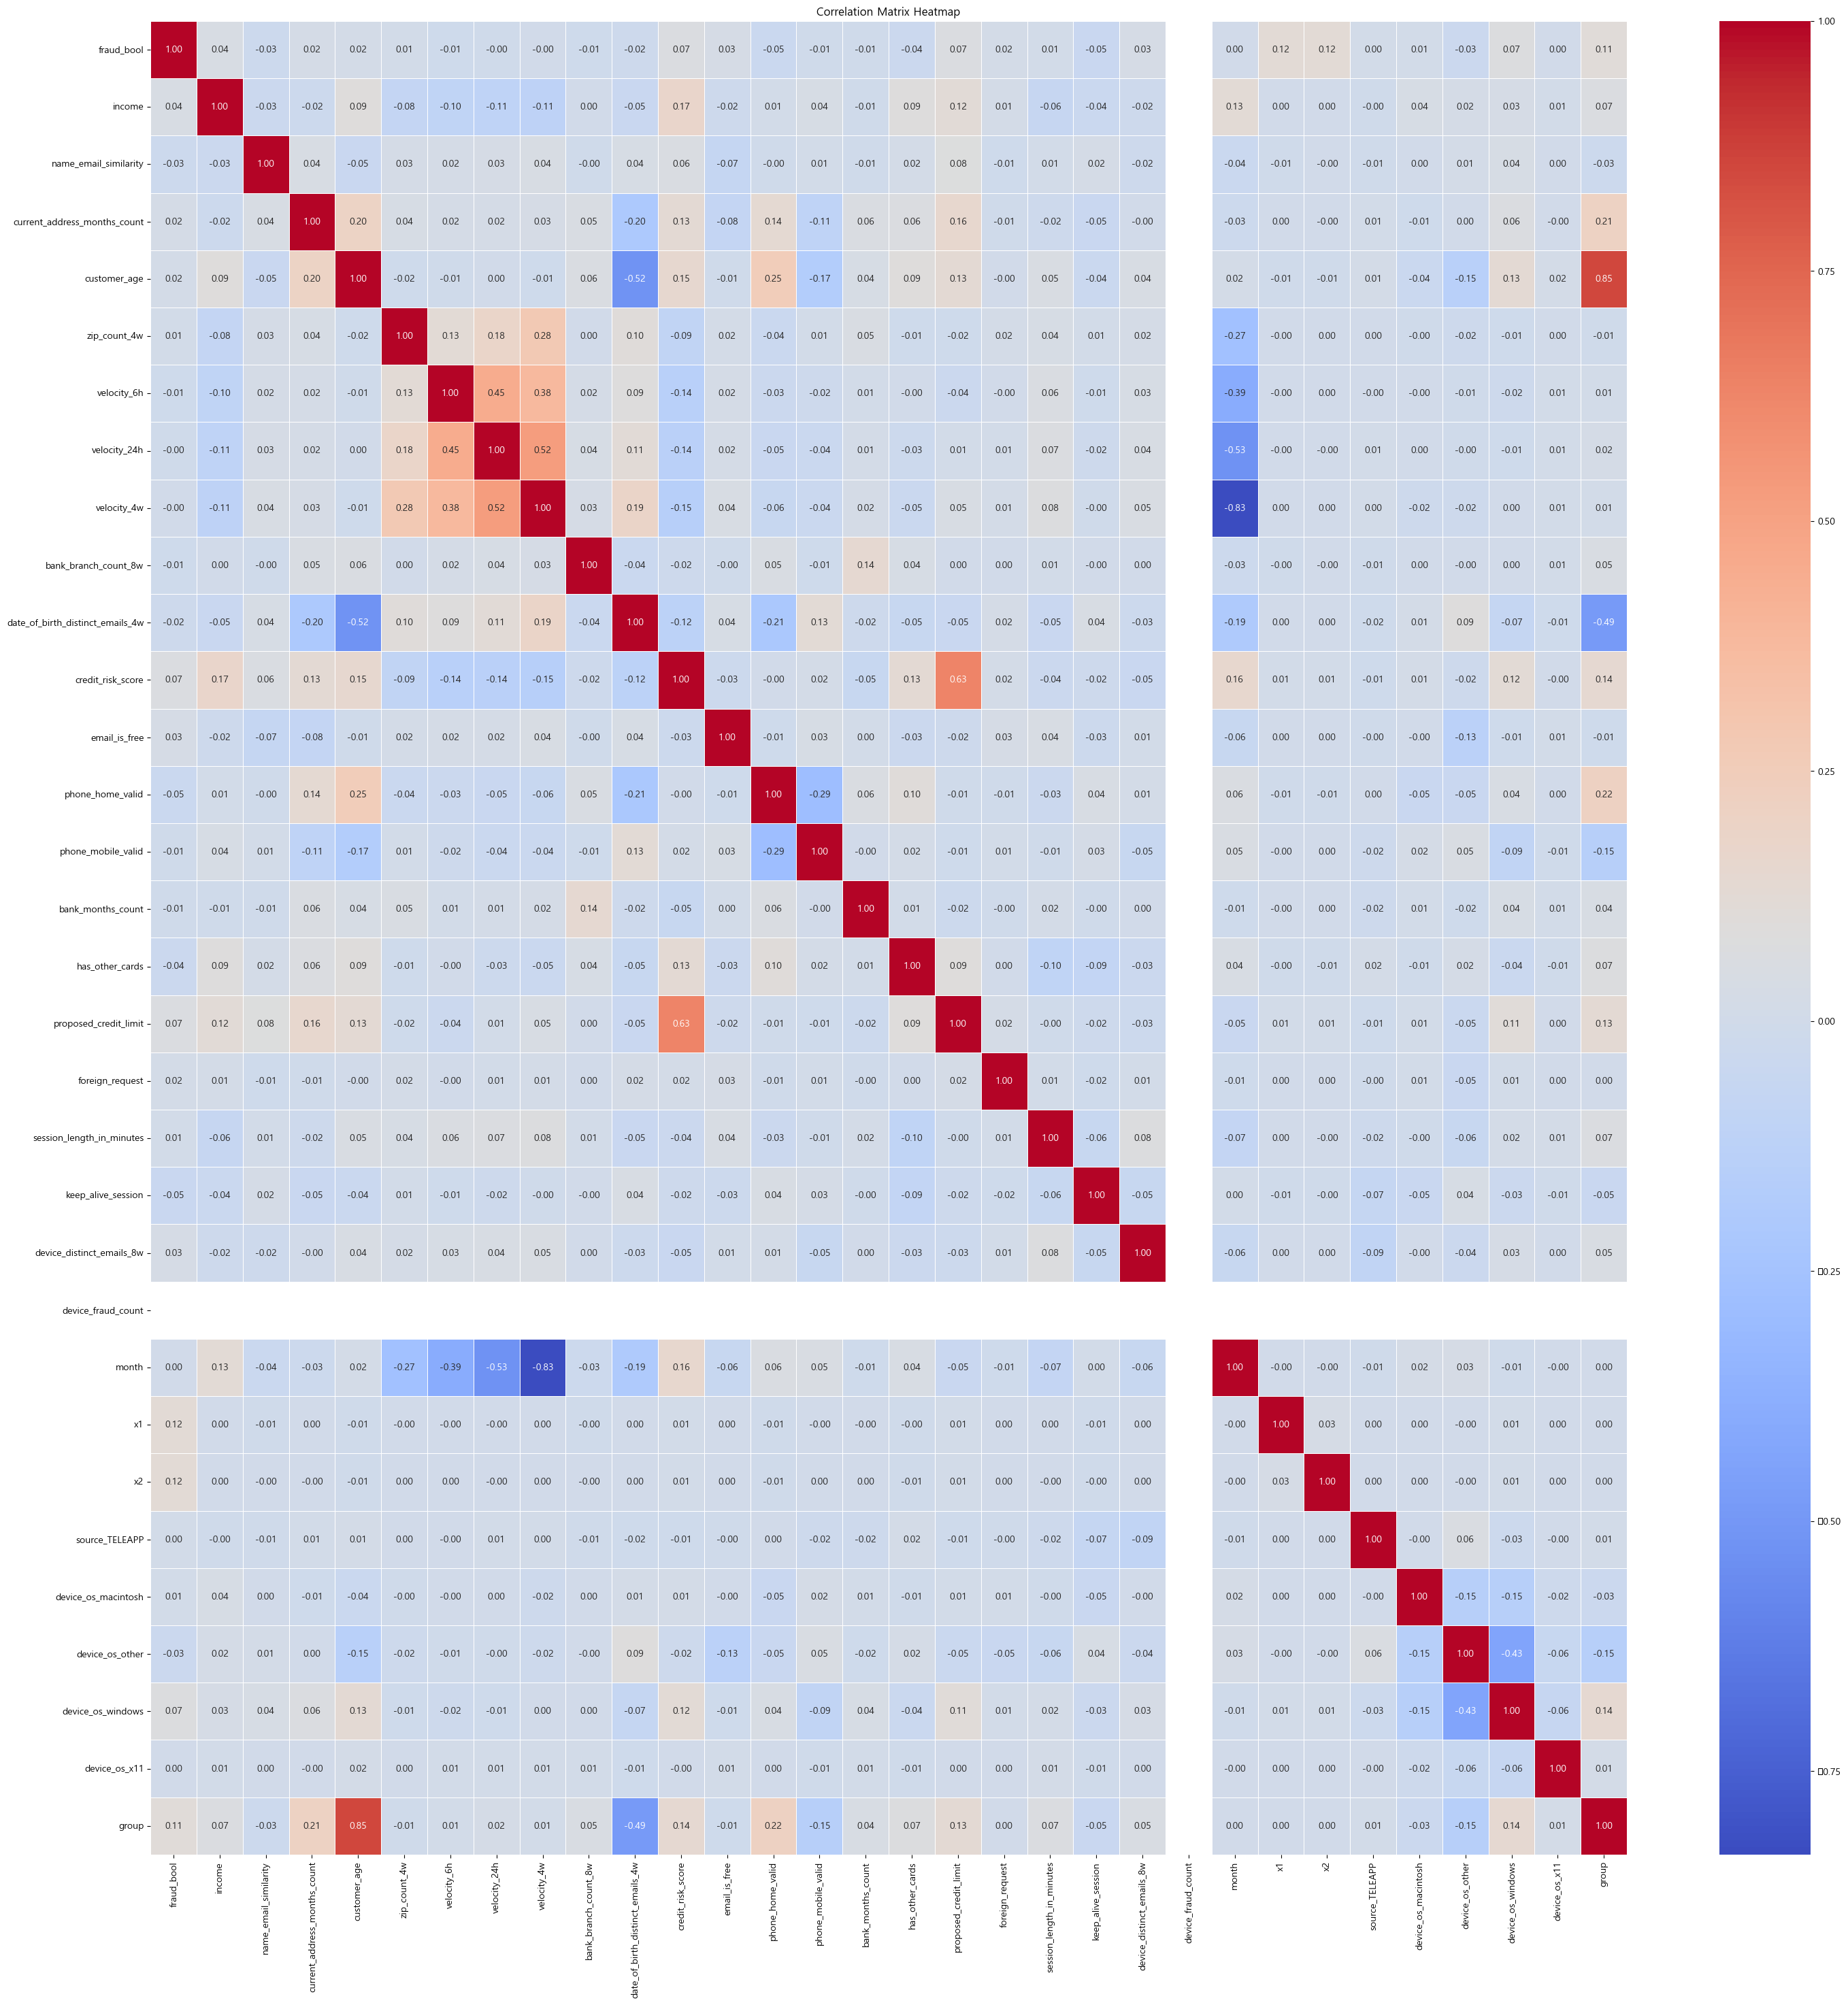

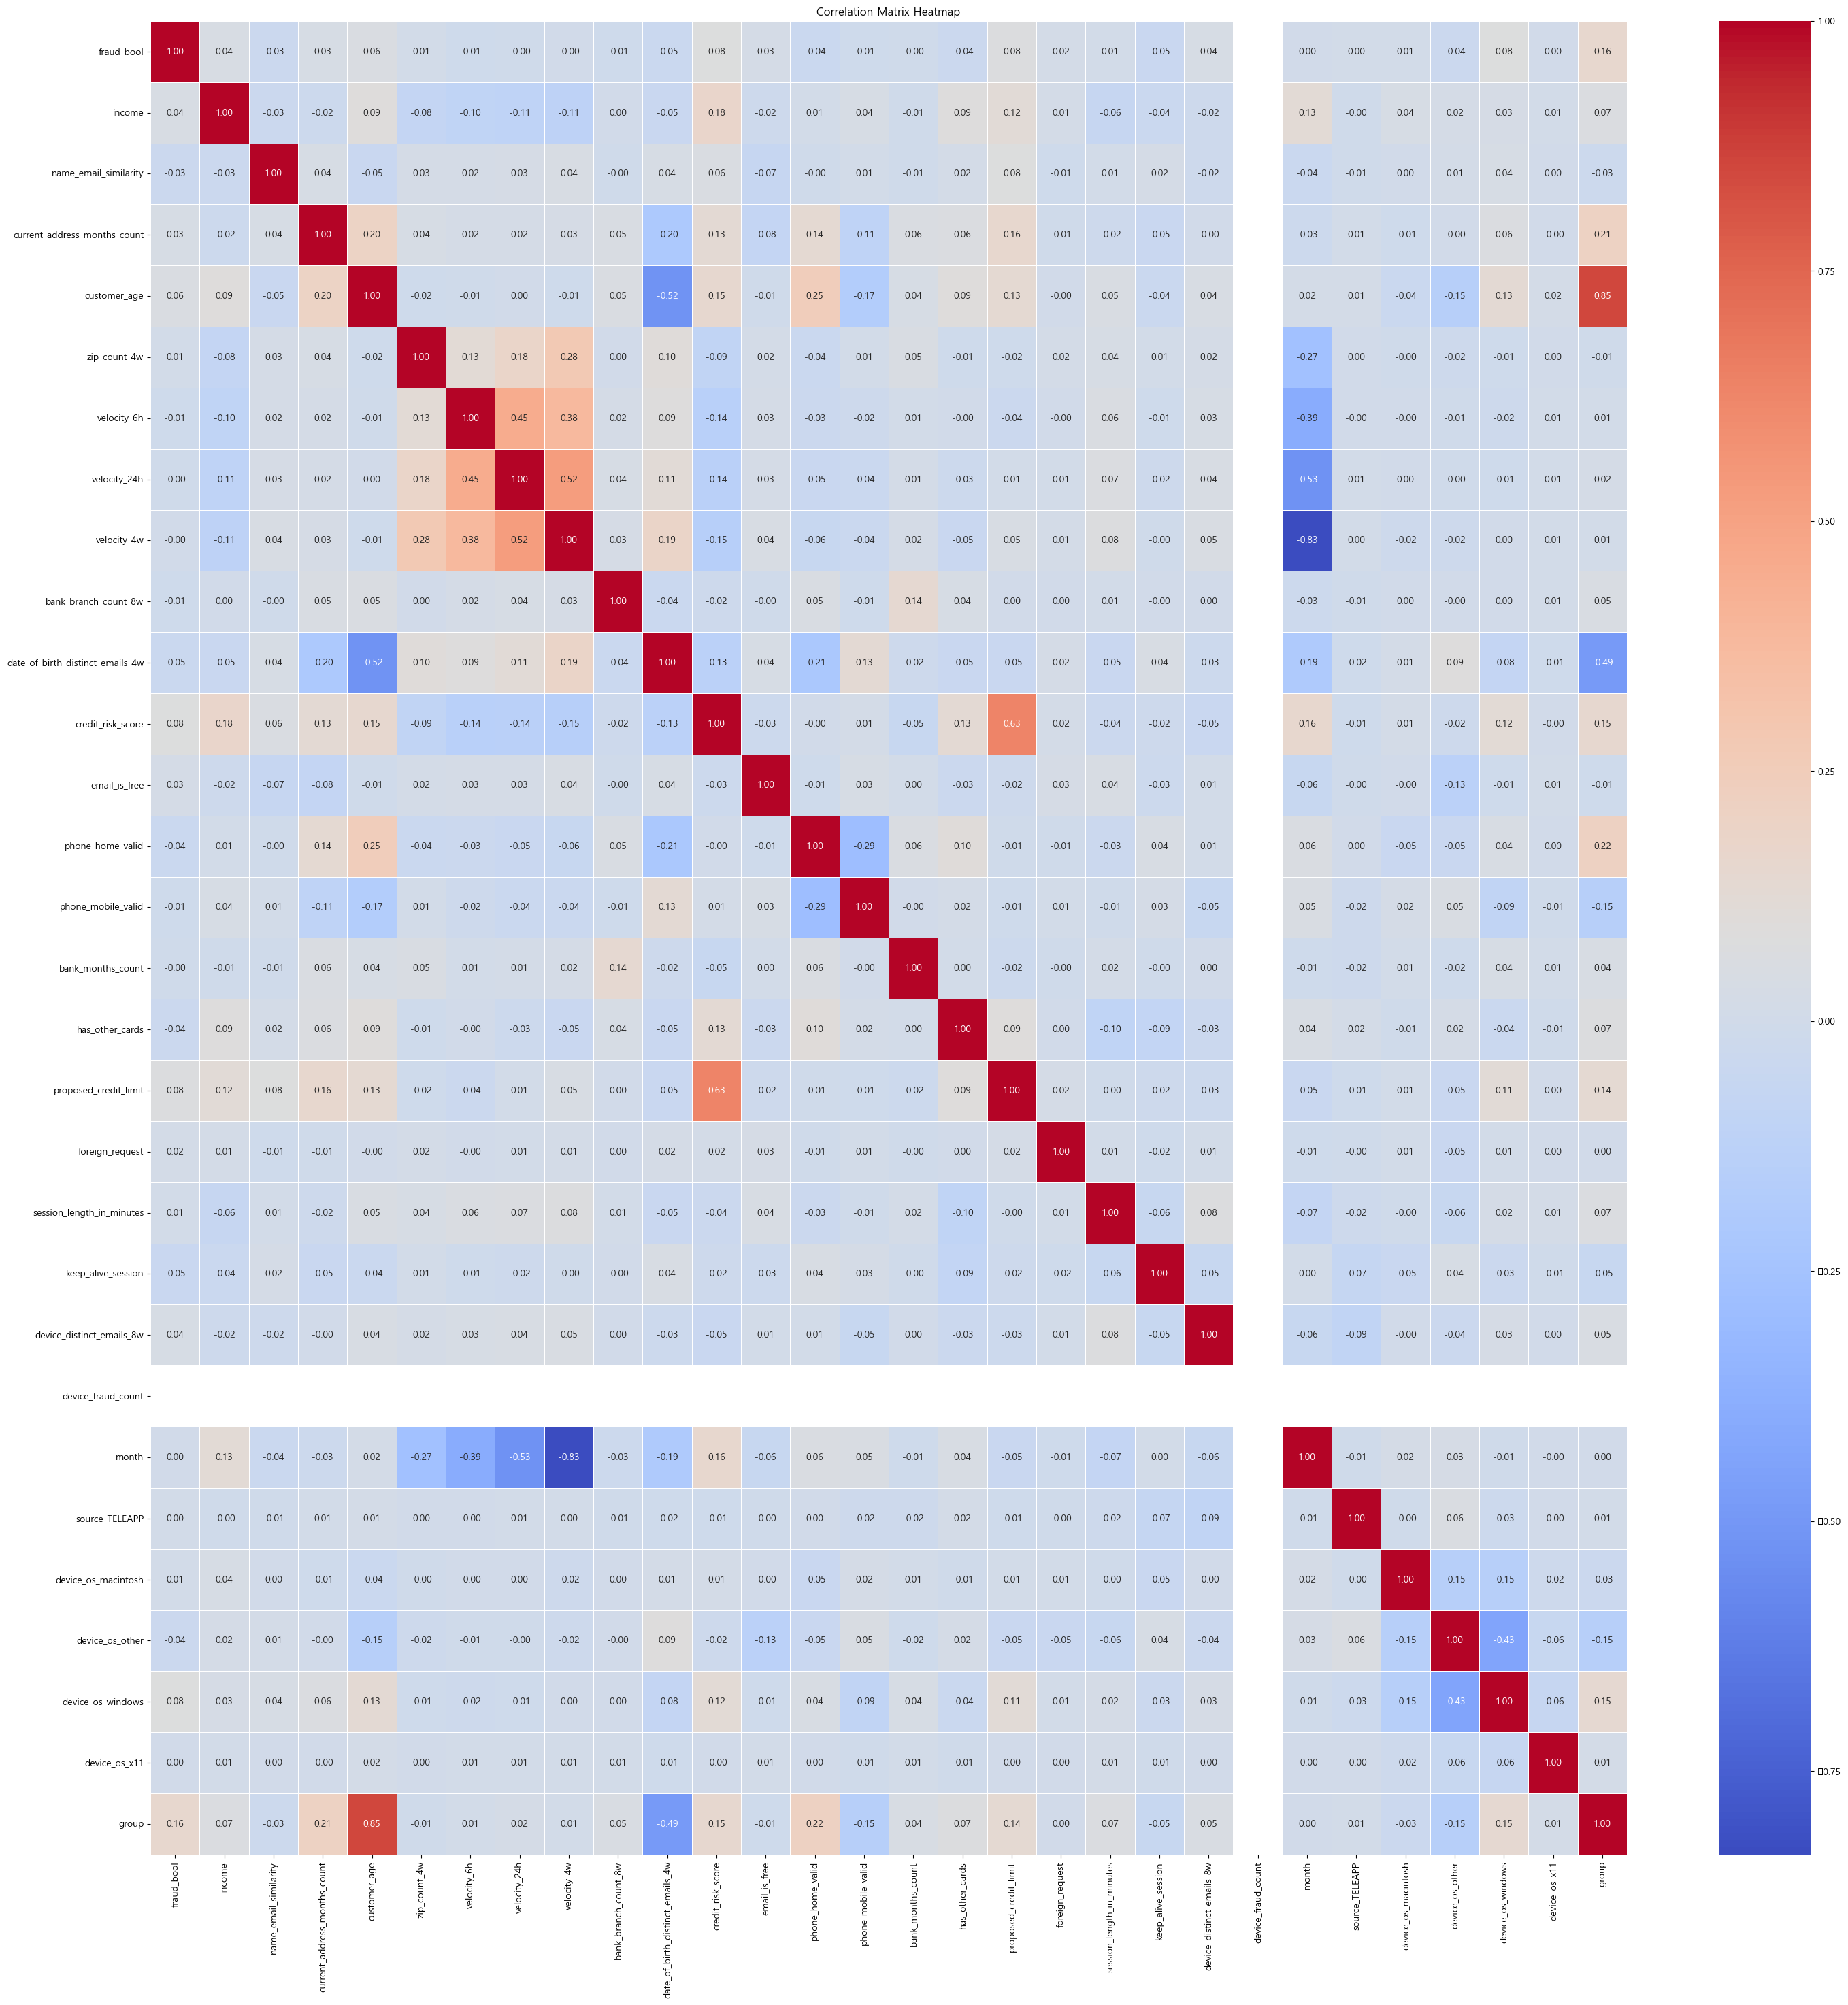

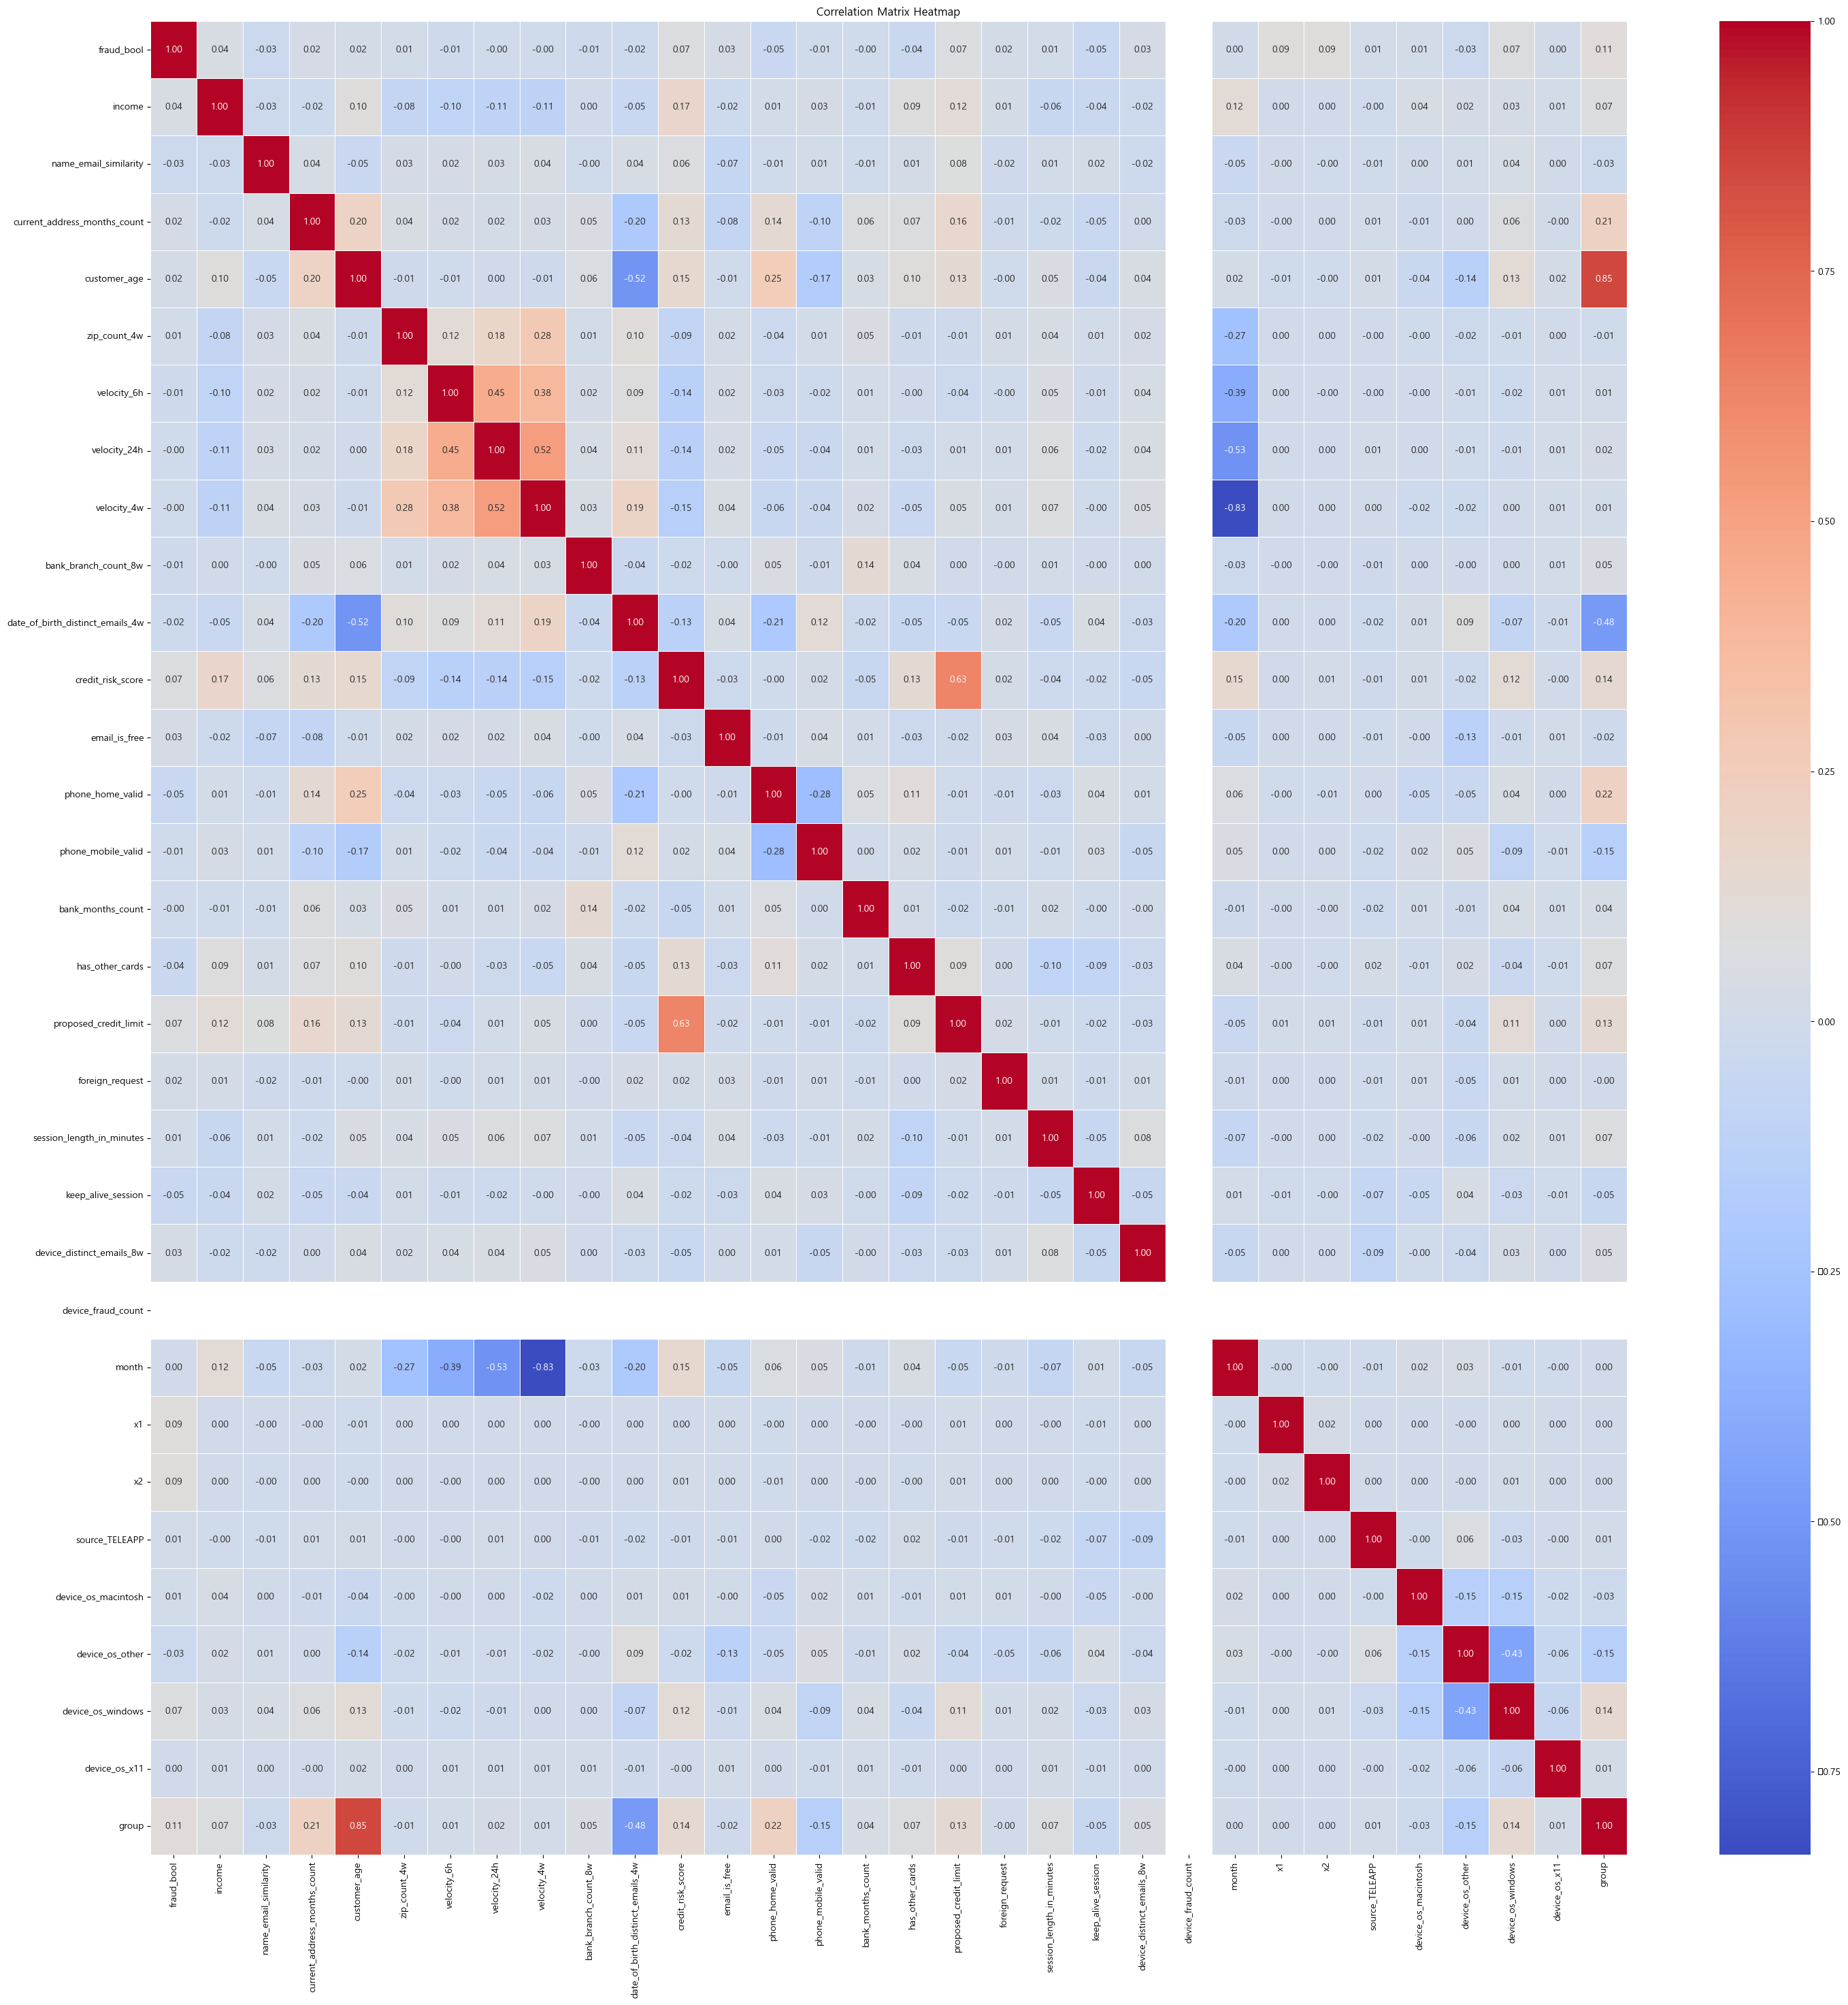

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

df = [base_copy, var1_copy, var2_copy, var3_copy, var4_copy, var5_copy]
for df in df:
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(35, 35))
    sns.heatmap(
        correlation_matrix,  
        annot=True,          
        cmap='coolwarm',     
        fmt=".2f",          
        linewidths=.5,      
        cbar=True           
    )
    plt.title('Correlation Matrix Heatmap')
    plt.show()


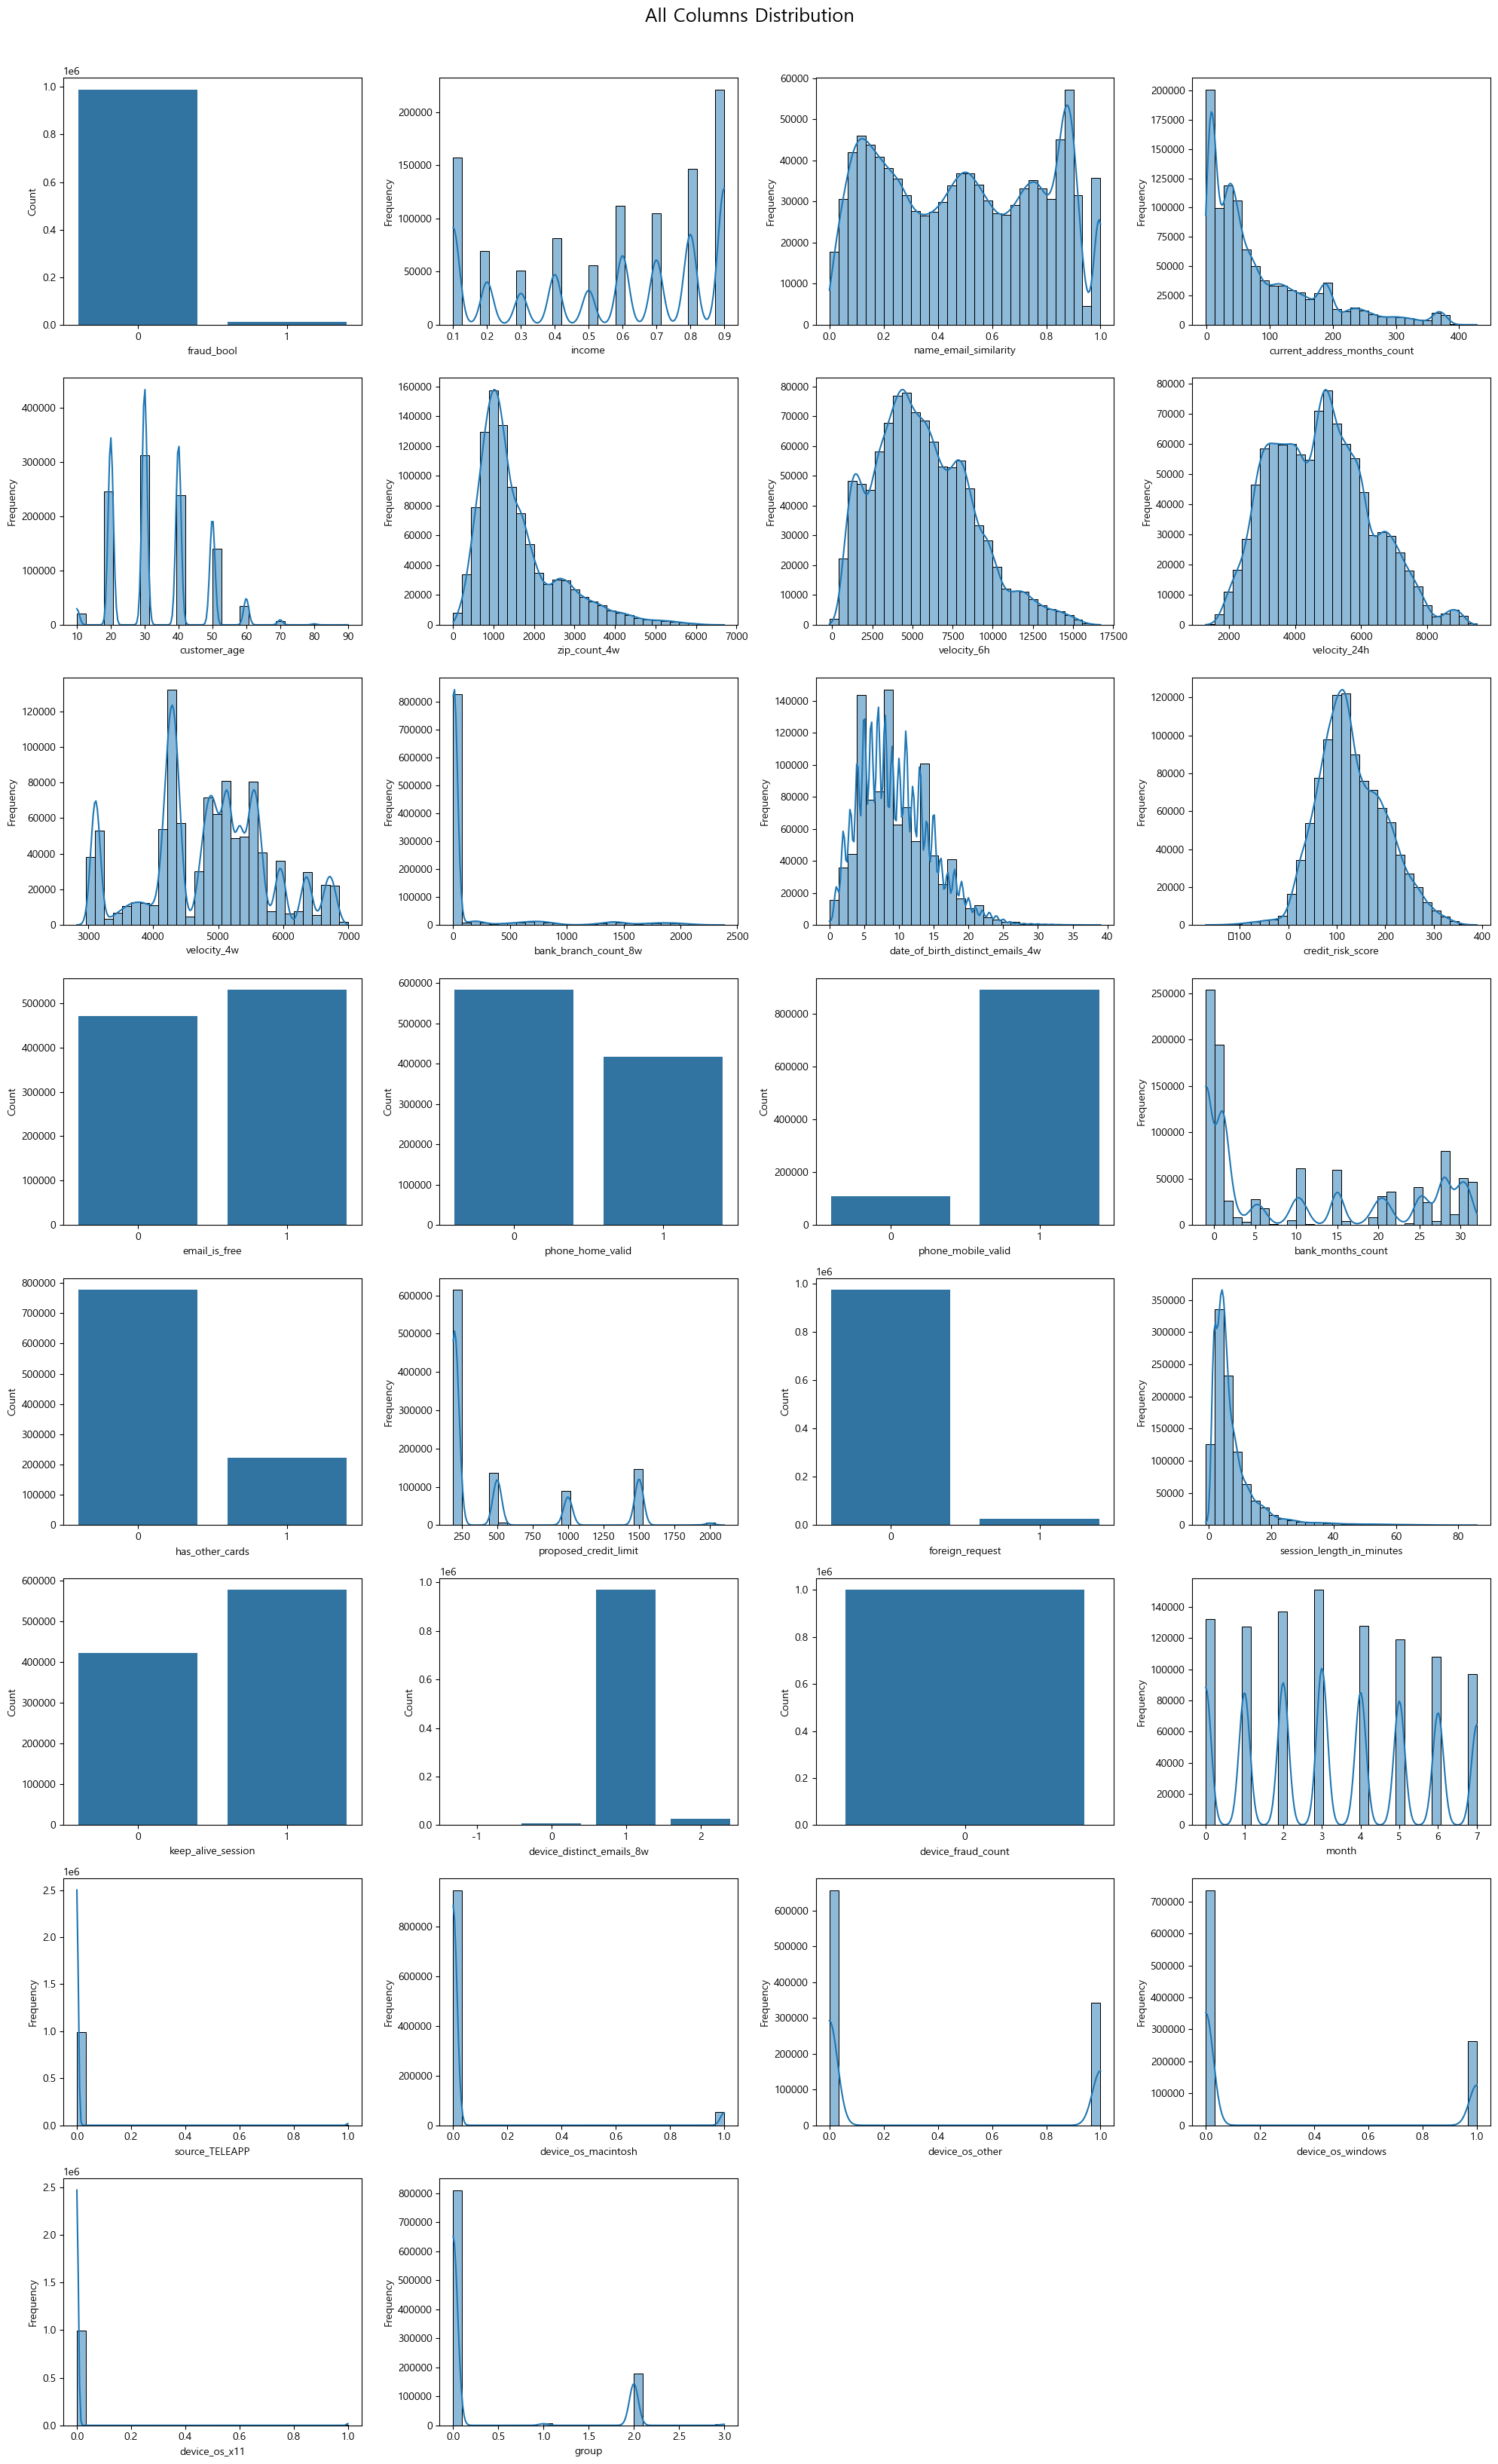

In [130]:
### Distribution of All Columns ###
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = len(base_copy.columns)
x = 4
y = (num_cols + x - 1) // x 
plt.figure(figsize=(x * 5, y * 4))
for i, col in enumerate(base_copy.columns):
    plt.subplot(y, x, i + 1)

    if base_copy[col].nunique() < 5 and base_copy[col].dtype == 'int64':
            sns.countplot(x=col, data=base_copy)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Count', fontsize=10)

    else:
        sns.histplot(base_copy[col], kde=True, bins=30)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.suptitle('All Columns Distribution', y=1.02, fontsize=18) 
plt.show()

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import defaultdict



In [132]:
#%%
## data splitting for modeling
def split_train_test(df):
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 0), 'group'] = 0
    df.loc[(df['customer_age'] < 50) & (df['fraud_bool'] == 1), 'group'] = 1
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 0), 'group'] = 2
    df.loc[(df['customer_age'] >= 50) & (df['fraud_bool'] == 1), 'group'] = 3
    df['group'] = df['group'].astype(int)
    X = df.drop(columns=['fraud_bool', 'group'])
    y = df['fraud_bool']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['group'])
    
    return X_train, X_test, y_train, y_test

In [133]:
x_train_base, x_test_base, y_train_base, y_test_base = split_train_test(base_sam)
x_train_var1, x_test_var1, y_train_var1, y_test_var1 = split_train_test(var1_sam)
x_train_var2, x_test_var2, y_train_var2, y_test_var2 = split_train_test(var2_sam)
x_train_var3, x_test_var3, y_train_var3, y_test_var3 = split_train_test(var3_sam)
x_train_var4, x_test_var4, y_train_var4, y_test_var4 = split_train_test(var4_sam)
x_train_var5, x_test_var5, y_train_var5, y_test_var5 = split_train_test(var5_sam)

In [134]:
# %%
XGB = XGBClassifier()
LGB = LGBMClassifier()
CB = CatBoostClassifier()
GB = GradientBoostingClassifier()



In [135]:
def k_fold_training_smote(base_model, X, y, n_splits=5, random_state=42):

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    auc_scores = []
    last_pipeline = None

    for train_idx, val_idx in cv.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        pipe = Pipeline([
            ('smote', SMOTE(random_state=random_state)),
            ('clf', base_model)
        ])
        pipe.fit(X_tr, y_tr)

        y_val_proba = pipe.predict_proba(X_val)[:, 1]
        auc_scores.append(roc_auc_score(y_val, y_val_proba))

        # 마지막 fold의 pipeline을 저장
        last_pipeline = pipe

    return auc_scores, last_pipeline

In [136]:
default_xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc',
    n_jobs = -1 # K-Fold 훈련 시에는 'auc'보다 'logloss'가 더 일반적
)
datasets = {
    'base':  (x_train_base,  x_test_base,  y_train_base,  y_test_base),
    'var1':  (x_train_var1,  x_test_var1,  y_train_var1,  y_test_var1),
    'var2':  (x_train_var2,  x_test_var2,  y_train_var2,  y_test_var2),
    'var3':  (x_train_var3,  x_test_var3,  y_train_var3,  y_test_var3),
    'var4':  (x_train_var4,  x_test_var4,  y_train_var4,  y_test_var4),
    'var5':  (x_train_var5,  x_test_var5,  y_train_var5,  y_test_var5)
}





In [139]:

results = {}

roc_data = defaultdict(dict)

for name, (X_tr, X_te, y_tr, y_te) in datasets.items():
    print(f"\n==== Processing dataset: {name} ====")

    # 2-1) XGBClassifier 초기화
    xgb_model = XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='auc'
    )

    # 2-2) K-Fold + SMOTE 학습
    auc_scores_cv, last_pipeline = k_fold_training_smote(xgb_model, X_tr, y_tr)
    print(f"  K-Fold CV AUC scores: {auc_scores_cv}")
    print(f"  Average CV AUC: {np.mean(auc_scores_cv):.4f}  (± {np.std(auc_scores_cv):.4f})")

    # 2-3) XGBoost feature importance 추출
    booster = last_pipeline.named_steps['clf'].get_booster()
    importance_dict = booster.get_score(importance_type='weight')  # weight, gain, cover 등 선택 가능

    # 2-4) XGBoost 내부 f0, f1 → 실제 컬럼명 매핑
    fmap = {f"f{i}": col for i, col in enumerate(X_tr.columns)}
    importance_df = pd.DataFrame({
        'feature': [fmap.get(k, k) for k in importance_dict.keys()],
        'importance': list(importance_dict.values())
    }).sort_values(by='importance', ascending=False)
    print("  변환된 중요도 DataFrame:")
    print(importance_df)

    # 2-5) 테스트셋 예측 및 지표 계산
    y_pred_proba = last_pipeline.predict_proba(X_te)[:, 1]
    y_pred_label = last_pipeline.predict(X_te)

    auc_test = roc_auc_score(y_te, y_pred_proba)
    acc = accuracy_score(y_te, y_pred_label)
    prec = precision_score(y_te, y_pred_label, zero_division=0)
    rec = recall_score(y_te, y_pred_label, zero_division=0)
    f1 = f1_score(y_te, y_pred_label, zero_division=0)
    print(f"  테스트 AUC: {auc_test:.4f}  |  정확도: {acc:.4f}  |  정밀도: {prec:.4f}  |  재현율: {rec:.4f}  |  F1: {f1:.4f}")

    # 2-6) ROC 곡선 좌표 저장 (루프 내에서는 그리지 않음)
    fpr, tpr, thr = roc_curve(y_te, y_pred_proba)
    roc_data[name]['fpr'] = fpr
    roc_data[name]['tpr'] = tpr
    roc_data[name]['auc'] = auc_test

    # 2-7) Youden’s J statistic으로 최적 임계값 계산 및 classification_report
    youden_idx = np.argmax(tpr - fpr)
    thr_youden = thr[youden_idx]
    y_pred_youden = (y_pred_proba >= thr_youden).astype(int)
    print("  Classification Report (Youden's J):")
    print(classification_report(y_te, y_pred_youden, zero_division=0))

    # 2-8) 임계값별 FPR, TPR도 필요하다면 따로 저장 가능
    #    (예: thr_dict[name] = {'thr_youden': thr_youden, 'fpr': fpr, 'tpr': tpr})

    



==== Processing dataset: base ====
  K-Fold CV AUC scores: [0.7962999600721573, 0.7518403791134295, 0.8254733172855961, 0.8111099090182315, 0.774036293445392]
  Average CV AUC: 0.7918  (± 0.0262)
  변환된 중요도 DataFrame:
                             feature  importance
5                        velocity_6h       374.0
6                       velocity_24h       338.0
4                       zip_count_4w       332.0
0                             income       303.0
7                        velocity_4w       291.0
3                       customer_age       277.0
2       current_address_months_count       258.0
10                 credit_risk_score       253.0
14                 bank_months_count       228.0
1              name_email_similarity       226.0
18         session_length_in_minutes       225.0
16             proposed_credit_limit       187.0
8               bank_branch_count_8w       183.0
9   date_of_birth_distinct_emails_4w       140.0
21                             month        93.

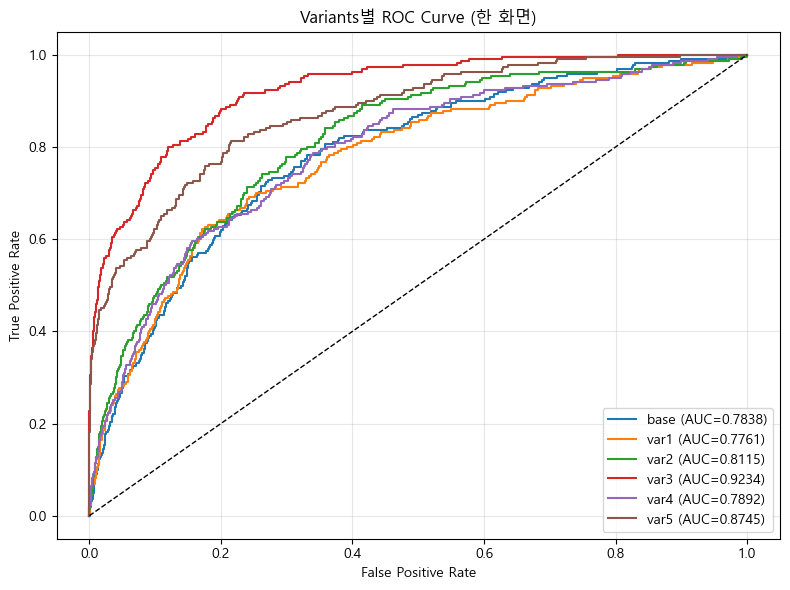

In [140]:
plt.figure(figsize=(8, 6))

for name, d in roc_data.items():
    plt.plot(d['fpr'], d['tpr'], label=f"{name} (AUC={d['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)     # 대각선
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Variants별 ROC Curve (한 화면)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()